https://web.microsoftstream.com/video/6befd026-44a9-40e3-9977-2ae025732113

https://colab.research.google.com/drive/1W0rwevnH3ovDt6-m3ThXvirkYp3K45h1?usp=sharing#scrollTo=Nq8_oh49E5j7

In [1]:
#!sudo apt-get update -y
#
# homebrew install spatialindex

Password:


In [3]:
!pip install geopandas geopy mapclassify rtree

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_inter

In [3]:
import os
import requests
import pandas as pd
import geopandas as gpd

In [4]:
def download_data(url, save_as, save_dir, extract = False):
    '''
    Download a file using a direct download url and extract if a .zip file.

    Parameters
    ----------
    - url (str): direct download url for file of interest
    - save_as (str): name that the file should be saved as
    - save_dir (str): directory where the file should be saved
    - extract (bool): default, False - boolean to extract contents of .zip

    Returns
    -------
    File downloaded, saved, and extracted (if applies) in desired save directory.
    '''
    assert type(save_dir) == str
    assert type(save_as) == str
    assert type(extract) == bool
    assert type(url) == str

    if '/' != save_dir[0]:
        save_dir = '/' + save_dir

    if '.' not in save_dir:
        save_dir = '.' + save_dir
        
    os.makedirs('{}'.format(save_dir), exist_ok=True)

    r = requests.get(url)

    with open(os.path.join(save_dir, save_as),'wb') as f: 
        f.write(r.content)

    if extract:
        if '.zip' in save_as:
            os.system('unzip {} -d {}'.format(os.path.join(save_dir, save_as), save_dir))
        else:
            print('This file is not a .zip file. Please set the `extract` argument to False.')


Data

In [18]:
chicago_hospitals_url = 'https://data.cityofchicago.org/download/ucpz-2r55/application%2Fzip'
download_data(chicago_hospitals_url, 'chicago_hospitals.zip', 'chicago/hospitals', True)

Before plotting geo data, we need to select the appropriate projection so that everything is on the same standard. Otherwise, everything we do won't work. Setting the CRS each time we import. 

Download Chicago Community Area Boundary JSON

In [19]:
chicago_comm_area_url = 'https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON'
download_data(chicago_comm_area_url, 'community_areas.json', 'chicago')

Read Using geopandas and set the CRS to NAD83 Illinois East (EPSG = 3528).

In [20]:
comm_areas = gpd.read_file('./chicago/community_areas.json', driver='GeoJSON')
comm_areas = comm_areas.to_crs(epsg = 3528)

# Make 1,000 meters mean what we want it to mean

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Show the data 

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((360144.247 575106.337, 360143...."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((361581.719 572034.768, 361568...."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((358550.672 570339.105, 358551...."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((360372.479 572011.602, 360372...."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((361581.719 572034.768, 361582...."


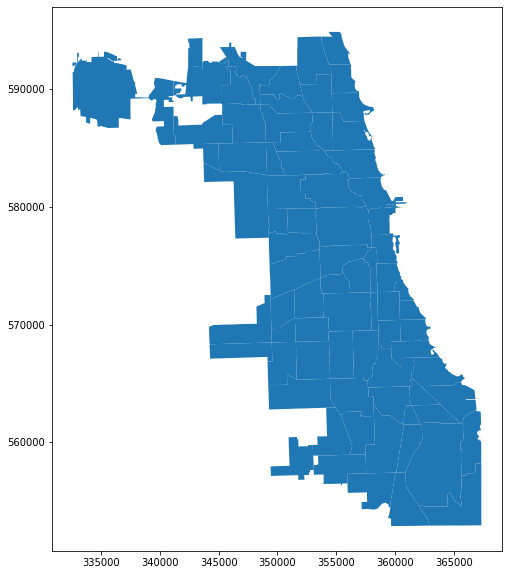

In [21]:
comm_areas.plot(figsize=(10, 10))
comm_areas.head()

Download Chicago Data

In [22]:
chicago_libraries_url = 'https://data.cityofchicago.org/api/views/x8fc-8rcq/rows.csv?accessType=DOWNLOAD'
download_data(chicago_libraries_url, 'chicago_libraries.csv', 'chicago/libraries')

Read in Chicago Libraries using geopandas.

In [23]:
libraries = gpd.read_file('./chicago/libraries/chicago_libraries.csv')
libraries.head()

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry
0,Vodak-East Side,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",3710 E. 106th St.,Chicago,IL,60617,(312) 747-5281,https://www.chipublib.org/locations/71/,"(41.70302747819179, -87.53350318470449)",None
1,Albany Park,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",None
2,Avalon,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",8148 S. Stony Island Ave.,Chicago,IL,60617,(312) 747-5234,https://www.chipublib.org/locations/8/,"(41.74671722160199, -87.58539658719002)",None
3,Brainerd,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",1350 W. 89th St.,Chicago,IL,60620,(312) 747-6291,https://www.chipublib.org/locations/13/,"(41.732316757097045, -87.65723451581835)",None
4,Popular Library at Water Works,"Mon. - Thu., 9-7; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.89758435399726, -87.62314877110073)",None


Create libraries geometry data using the LOCATION column. First, we create separate X and Y columns.

In [24]:
libraries['X'] = libraries.LOCATION.apply(lambda x: float(x.replace(')', '').split(',')[1]))
libraries['Y'] = libraries.LOCATION.apply(lambda x: float(x.replace('(', '').split(',')[0]))
libraries.head()

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,X,Y
0,Vodak-East Side,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",3710 E. 106th St.,Chicago,IL,60617,(312) 747-5281,https://www.chipublib.org/locations/71/,"(41.70302747819179, -87.53350318470449)",None,-87.533503,41.703027
1,Albany Park,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",None,-87.714090,41.975456
2,Avalon,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",8148 S. Stony Island Ave.,Chicago,IL,60617,(312) 747-5234,https://www.chipublib.org/locations/8/,"(41.74671722160199, -87.58539658719002)",None,-87.585397,41.746717
3,Brainerd,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",1350 W. 89th St.,Chicago,IL,60620,(312) 747-6291,https://www.chipublib.org/locations/13/,"(41.732316757097045, -87.65723451581835)",None,-87.657235,41.732317
4,Popular Library at Water Works,"Mon. - Thu., 9-7; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.89758435399726, -87.62314877110073)",None,-87.623149,41.897584


Next, we will use the newly created X and Y columns to create our geometry. Don't forget to set and change the CRS!

In [25]:
libraries.geometry = gpd.points_from_xy(x = libraries.X, y = libraries.Y)
libraries.crs = {'init':'epsg:4326'}
libraries = libraries.to_crs(epsg = 3528)

# Convert universal CRS to the East Illinois CRS

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Plot Chicago's libraries onto community areas.

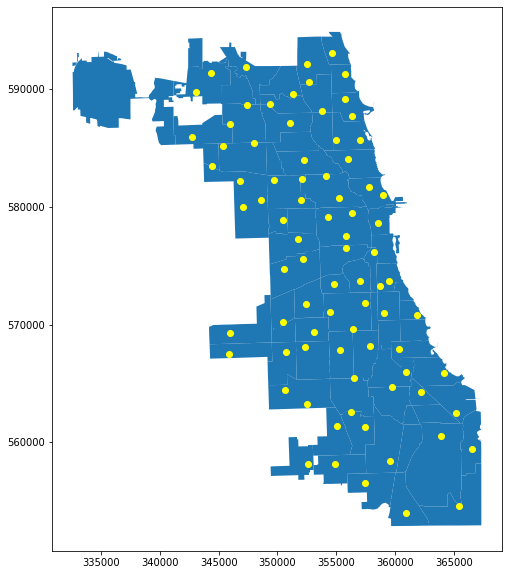

In [26]:
libraries.plot(color = 'yellow', ax = comm_areas.plot(figsize = (10, 10)))

Create buffer points 

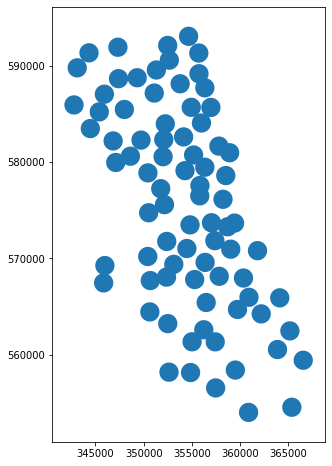

In [27]:
libraries.buffer(1000).plot(figsize = (8, 8)) # Apply buffer of 1000 meters to library points, which just makes them larger

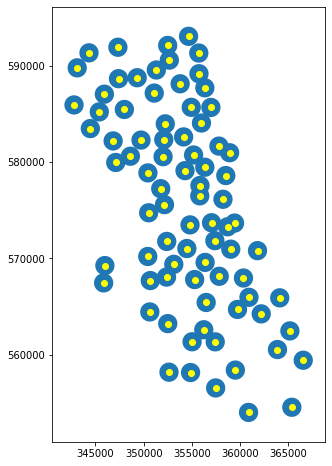

In [28]:
libraries.plot(color = 'yellow', ax = libraries.buffer(1000).plot(figsize = (8, 8)))
# Plotting the original points on top of the buffer we just created. 

Creating buffers of polygons.

In [29]:
hyde_park = comm_areas[comm_areas['community'] == 'HYDE PARK']

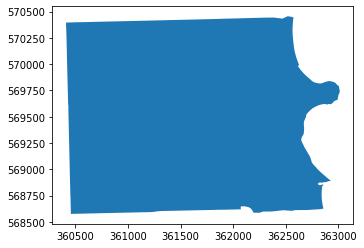

In [30]:
hyde_park.plot()

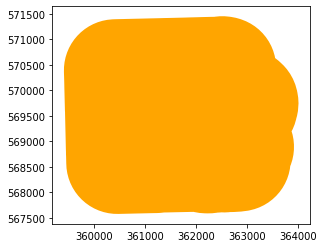

In [31]:
hyde_park.buffer(1000).plot(color = 'orange')
# Applying the buffer to a polygon doesn't just make it larger

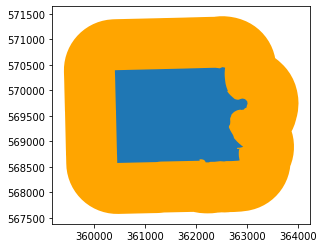

In [32]:
hyde_park.plot(ax=hyde_park.buffer(1000).plot(color = 'orange'))

Boundaries and centroids

Boundaries of polygons.

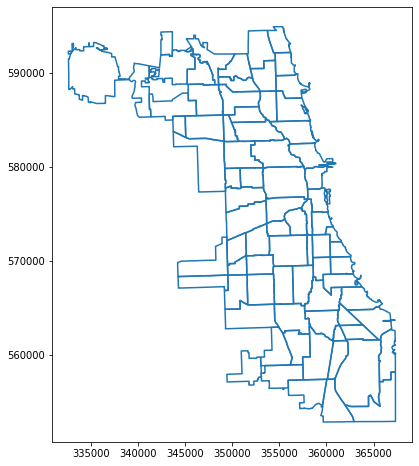

In [33]:
comm_areas.boundary.plot(figsize = (8, 8))

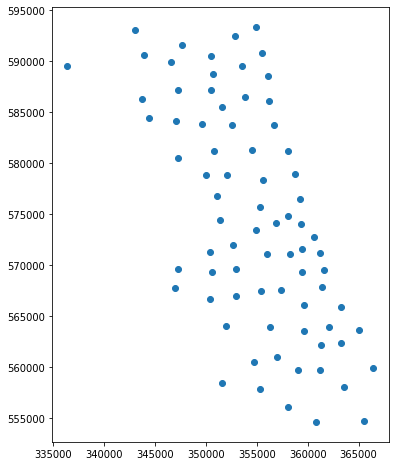

In [34]:
comm_areas.centroid.plot(figsize = (8, 8))

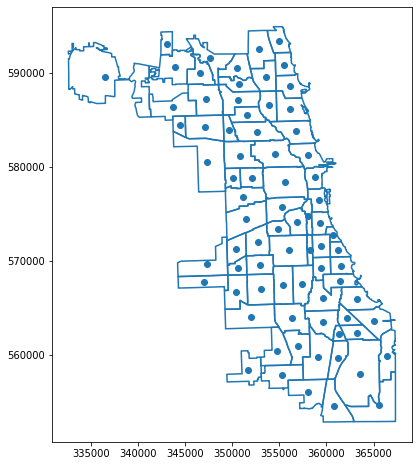

In [35]:
comm_areas.centroid.plot(ax = comm_areas.boundary.plot(figsize = (8, 8)))
# This is just x-y mean, but can do population weighted centroid as well 

### Envelopes, Convex Hulls, and Simplifications

Envelopes

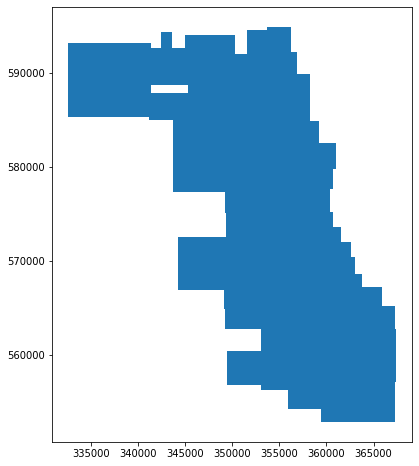

In [36]:
comm_areas.envelope.plot(figsize=(8, 8))

Let's see the boundaries of the envelopes to see what's going on.

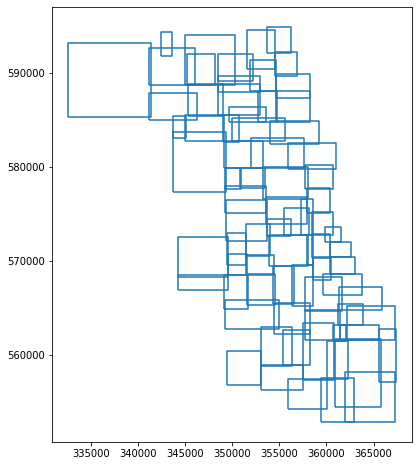

In [37]:
comm_areas.envelope.boundary.plot(figsize=(8, 8))

Convex Hulls
Learn more about Convex Hulls [here](https://brilliant.org/wiki/convex-hull/).

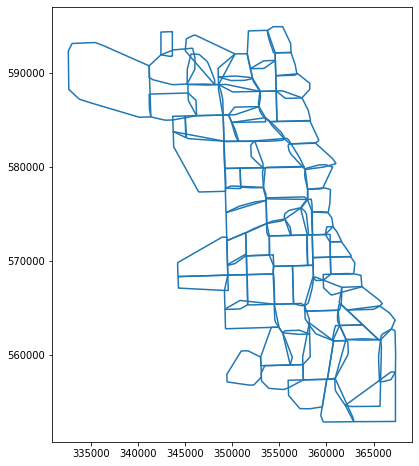

In [38]:
comm_areas.convex_hull.boundary.plot(figsize = (8, 8))

Simplifications

In [39]:
ohare = comm_areas[comm_areas['community'] == 'OHARE']

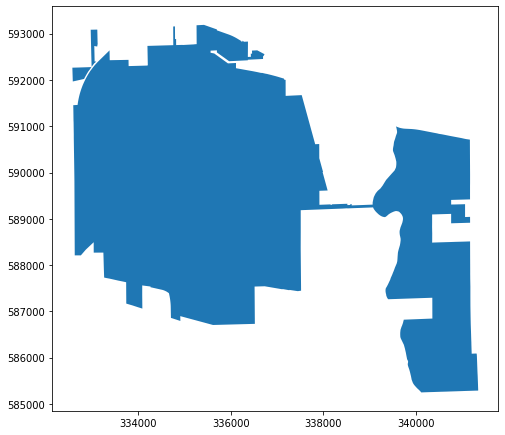

In [40]:
ohare.plot(figsize = (8, 8))

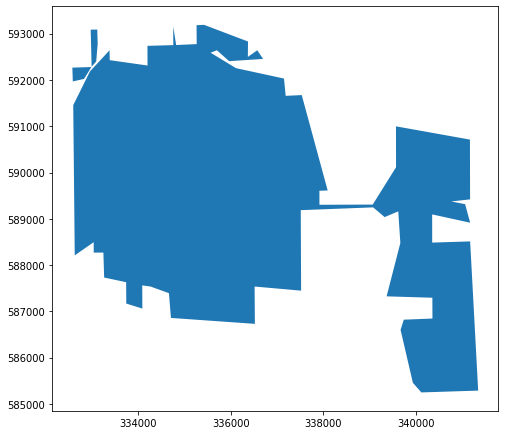

In [41]:
ohare.simplify(tolerance=100).plot(figsize = (8, 8))
# Simplify rounds a lot of edges and makes actual representation a lot less complex
# Condenses points and draws straight lines between fewer points 

### Exercise: Plot a 1 Mile Radius Around Each Library Over Chicago's Community Areas

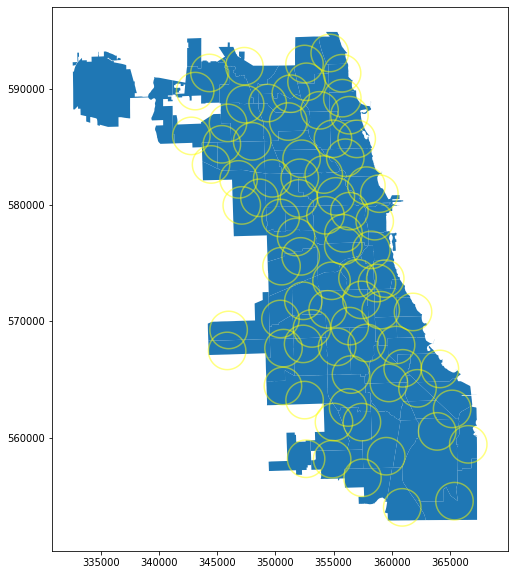

In [42]:
libraries.buffer(1609.34).boundary.plot(color = 'yellow', 
                               alpha = .5, 
                               ax = comm_areas.plot(figsize = (10, 10)))

# 1 mile = 1609.34
# Boundary just gives the circles themselves

### Exercise: Plot a 1 x 1 Mile Bounding Box Around Each Library Over Chicago's Community Areas

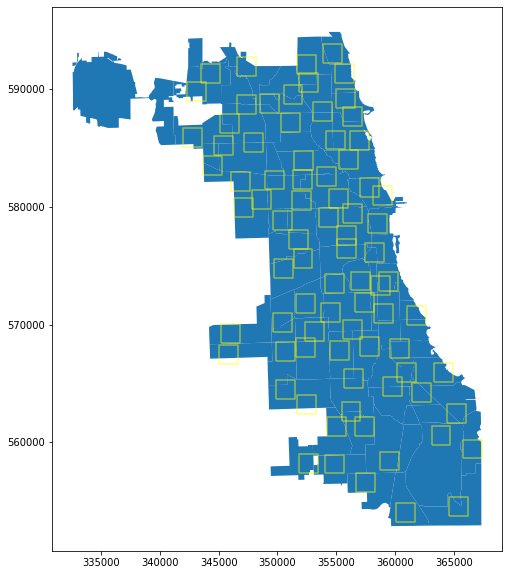

In [43]:
libraries.buffer(804.672).envelope.boundary.plot(color = 'yellow', 
                                                 alpha = .5, 
                                                 ax = comm_areas.plot(figsize = (10, 10)))

# Envelope uses boxes instead of circles

# Spatial Joins

Download Chicago Population by block data.

In [44]:
chicago_pop_blocks_url = 'https://data.cityofchicago.org/api/views/5yjb-v3mj/rows.csv?accessType=DOWNLOAD'
download_data(chicago_pop_blocks_url, 'chicago_pop_blocks.csv', 'chicago/population')
chicago_blocks_url = 'https://data.cityofchicago.org/api/geospatial/mfzt-js4n?method=export&format=GeoJSON'
download_data(chicago_blocks_url, 'blocks.json', '/chicago')

Read Chicago Population by block data.

In [45]:
block_pop = pd.read_csv('./chicago/population/chicago_pop_blocks.csv')
block_pop['CENSUS BLOCK FULL'] = block_pop['CENSUS BLOCK FULL'].astype(str) # Columns we merge on must be same type
block_pop.head()

,CENSUS BLOCK,CENSUS BLOCK FULL,TOTAL POPULATION
0,310003002,170310310003002,104
1,310003003,170310310003003,46
2,310003004,170310310003004,40
3,310003005,170310310003005,58
4,310003006,170310310003006,75


In [46]:
blocks = gpd.read_file('./chicago/blocks.json', driver = 'GeoJSON')
blocks = blocks.to_crs(epsg = 3528)
blocks.geoid10 = blocks.geoid10.astype(str)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [47]:
blocks.shape

(46357, 8)

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((358558.100 566695.132, 358559...."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((358133.343 567289.247, 358134...."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((358073.804 567085.164, 358043...."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((349397.194 576627.546, 349396...."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((349918.541 576146.118, 349911...."


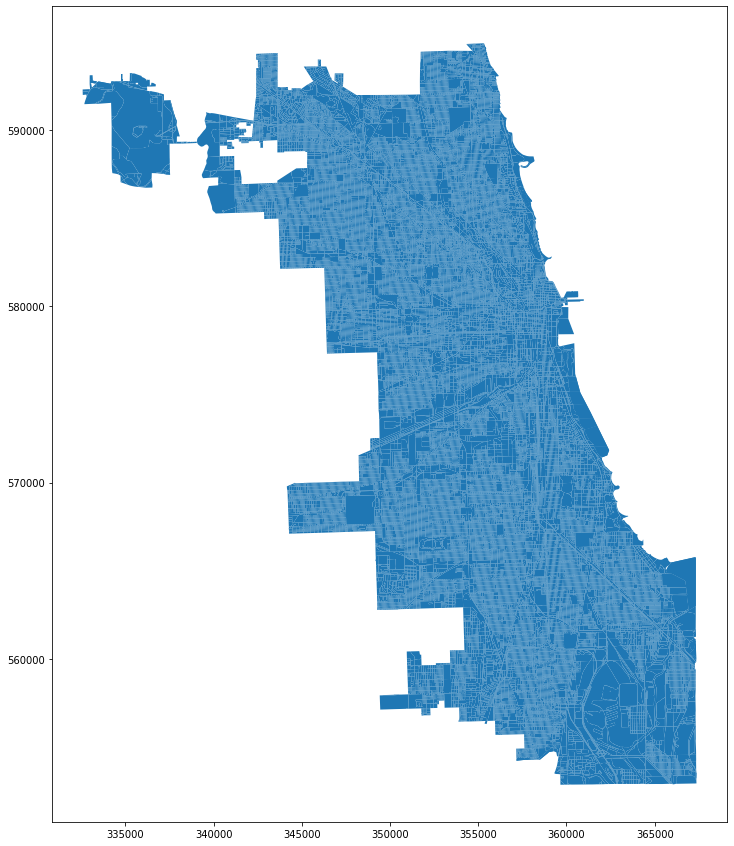

In [48]:
blocks.plot(figsize=(15,15))
blocks.head()

# Takes a while because we render each row as a polygon
# Here no polygon has the population by block, but we can merge them together. 

In [49]:
blocks_w_pop = blocks.merge(block_pop, left_on = 'geoid10', right_on = 'CENSUS BLOCK FULL', how = 'left')
# We join 2 datasets on the geoid10 column

In [50]:
blocks_w_pop = blocks_w_pop.dropna()

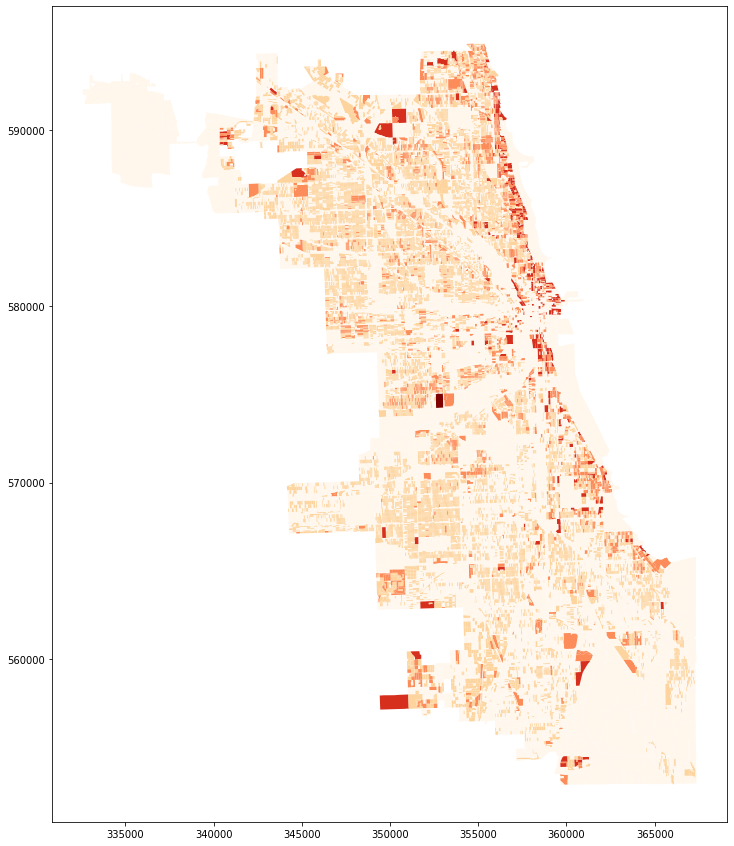

In [51]:
blocks_w_pop.plot(column='TOTAL POPULATION', cmap='OrRd', figsize = (15, 15), scheme='natural_breaks')

In [52]:
comm_areas.area
# Area in sq meter of every community
# Could do same for blocks, but would be more intensive

0     4.273986e+06
1     1.571365e+06
2     1.850330e+06
3     4.505119e+06
4     2.700864e+06
          ...     
72    7.022038e+06
73    8.535718e+06
74    3.454480e+07
75    4.501169e+06
76    2.939121e+06
Length: 77, dtype: float64

# Intersects, Within, and Contains

Common Use Case: Subsetting Geometries - Blocks in Hyde Park

The several commented code blocks below are commented out because they have caused issues being run in Google Colab for reasons I have been unable to determine.

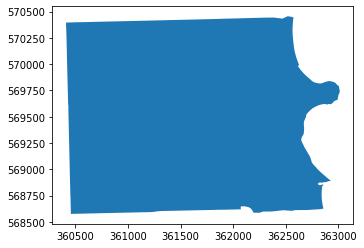

In [53]:
hyde_park.plot()

### I want to get every block within a defined area 

So I need boundary areas and then data set of actual blocks

- Intersect 
- Contain
- Within: Give me every geometry for the block that is fully encapsulated by the other larger thing; so if we were to plot, we'd lose some because they were'nt fully contained within Hyde Part; So we need to find block centroids within Hyde Park; but I need the geometries and not just the centroid, so I need to do one more step -> Filter original dataset and take subset to get blocks within hyde park 

Give me any row that is in the list and the list is a list of geo_ids from my Hyde park block centroid dataset

## Bringing It All Together: Analyzing Service Areas of Chicago Public Libraries

### Data

In [54]:
chicago_socioecon_url = 'https://data.cityofchicago.org/api/views/kn9c-c2s2/rows.csv?accessType=DOWNLOAD'
download_data(chicago_socioecon_url, 'socioecon_indicators.csv', 'chicago/population')

In [55]:
socioecon = pd.read_csv('./chicago/population/socioecon_indicators.csv')
socioecon.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [56]:
# blocks_to_comm_area = gpd.sjoin(blocks_w_pop_centroids, comm_areas[['community', 'geometry']], how = 'left', op = 'within')
# blocks_to_comm_area.head()

In [57]:
# pop_by_comm_area = blocks_to_comm_area.groupby('community').sum().drop(columns=['index_right', 'CENSUS BLOCK'])
# pop_by_comm_area.head()

In [58]:
# comm_areas_w_pop = comm_areas.merge(pop_by_comm_area, left_on='community', right_on='community', how='inner').rename(columns={'TOTAL POPULATION':'total_pop'})
# comm_areas_w_pop.head()

In [59]:
comm_areas_w_pop_url = 'https://drive.google.com/uc?export=download&id=1vNGsjKXcyJylOsmr5XeYkuEudehJY4DO'
download_data(comm_areas_w_pop_url, 'comm.json', 'chicago')

In [60]:
comm_areas_w_pop = gpd.read_file('./chicago/comm.json', driver='GeoJSON')
comm_areas_w_pop.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,total_pop,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,18238.0,"MULTIPOLYGON (((360144.247 575106.337, 360143...."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,5918.0,"MULTIPOLYGON (((361581.719 572034.768, 361568...."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,2942.0,"MULTIPOLYGON (((358550.672 570339.105, 358551...."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,21929.0,"MULTIPOLYGON (((360372.479 572011.602, 360372...."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,17841.0,"MULTIPOLYGON (((361581.719 572034.768, 361582...."


### How many communities does the Coleman Library serve that are at least within a .5 mile radius from the library?

In [61]:
coleman = libraries[libraries.NAME.str.contains('Cole')]

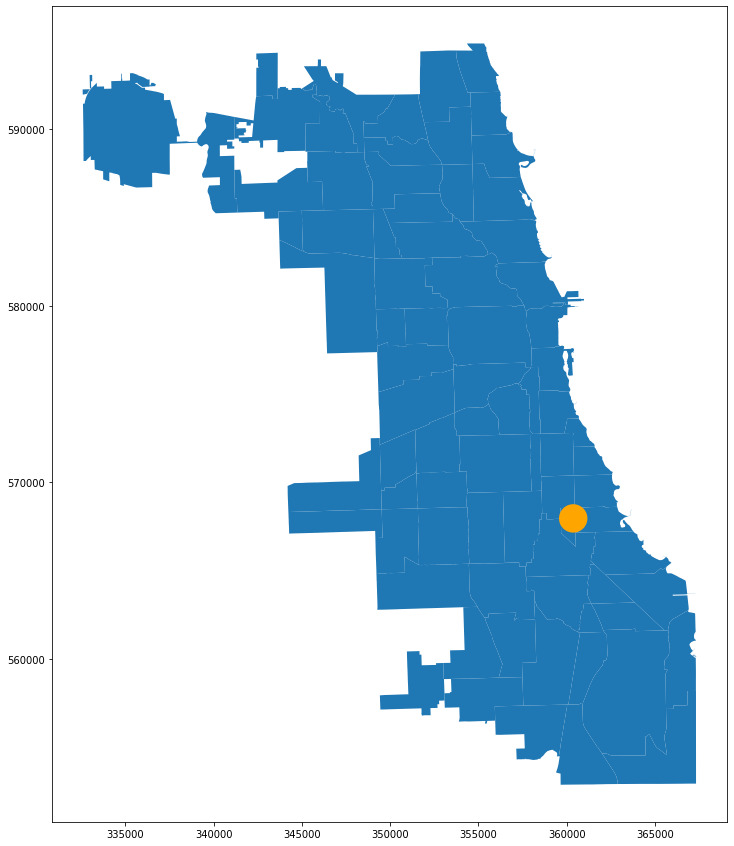

In [62]:
coleman.buffer(804.672).plot(color = 'orange', 
             ax= comm_areas.plot(figsize = (15, 15)))

In [63]:
coleman_buffer = coleman.copy()
coleman_buffer

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,X,Y
74,Coleman,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)",POINT (360369.356 567963.898),-87.607157,41.780373


In [64]:
coleman_buffer.geometry = coleman_buffer.buffer(804.672)
coleman_buffer

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,X,Y
74,Coleman,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)","POLYGON ((361174.028 567963.898, 361170.153 56...",-87.607157,41.780373


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,...,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,X,Y
6,WASHINGTON PARK,0,42373881.4842,0,40,40,0,0,28175.3160866,"MULTIPOLYGON (((360457.277 568575.672, 360438....",...,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)",-87.607157,41.780373
7,HYDE PARK,0,45105380.1732,0,41,41,0,0,29746.7082016,"MULTIPOLYGON (((362574.181 570443.416, 362572....",...,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)",-87.607157,41.780373
8,WOODLAWN,0,57815179.512,0,42,42,0,0,46936.9592443,"MULTIPOLYGON (((362858.783 568626.641, 362858....",...,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)",-87.607157,41.780373
66,GREATER GRAND CROSSING,0,98853167.7093,0,69,69,0,0,54645.3302996,"MULTIPOLYGON (((359665.746 567943.121, 359666....",...,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",731 E. 63rd St.,Chicago,IL,60637,(312) 747-7760,https://www.chipublib.org/locations/22/,"(41.78037301095412, -87.60715724280014)",-87.607157,41.780373


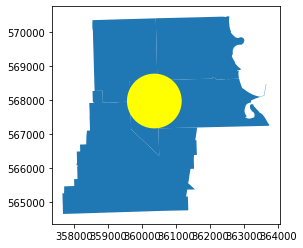

In [65]:
result = gpd.sjoin(comm_areas, coleman_buffer, op = 'intersects', how='inner')
coleman_buffer.plot(color = 'yellow', ax = result.plot())
result.head()

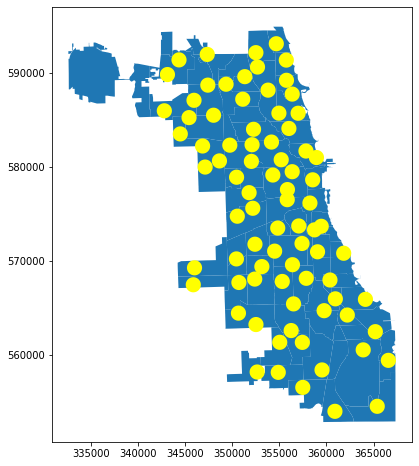

In [66]:
libraries.buffer(804.672).plot(color = 'yellow', ax = comm_areas.plot(figsize = (8, 8)))

In [67]:
buffered_libs = libraries.copy()
buffered_libs.geometry = buffered_libs.buffer(804.672)

In [68]:
communities_to_libs = gpd.sjoin(buffered_libs, comm_areas, how = 'left', op = 'intersects')
communities_to_libs.shape

(169, 22)

In [69]:
communities_to_libs.groupby('NAME')[['NAME']].count().rename(columns={'NAME':'count'}).sort_values('count', ascending = False)

,count
NAME,
Mayfair,5
Chicago Bee,4
Greater Grand Crossing,4
Coleman,4
Chinatown,4
...,...
Merlo,1
Jeffery Manor,1
Manning,1


Which libraries are accessible from within a mile of the top 3 communities with the highest proportion of the population living below the poverty line?

In [70]:
top3 = socioecon.sort_values('PERCENT HOUSEHOLDS BELOW POVERTY', ascending = False).iloc[:3]
top3

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
53,54.0,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
36,37.0,Fuller Park,3.2,51.2,33.9,26.6,44.9,10432,97.0
67,68.0,Englewood,3.8,46.6,28.0,28.5,42.5,11888,94.0


In [71]:
top3_geom = comm_areas[comm_areas['community'].isin(['RIVERDALE', 'FULLER PARK', 'ENGLEWOOD'])]
top3_geom

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((358550.672 570339.105, 358551...."
52,RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571,"MULTIPOLYGON (((360922.752 557509.419, 360921...."
65,ENGLEWOOD,0,85652323.0826,0,68,68,0,0,42316.8442973,"MULTIPOLYGON (((358612.252 568258.873, 358612...."


In [72]:
libs_top3 = gpd.sjoin(libraries, top3_geom, how = 'inner', op = 'intersects')
libs_top3

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,...,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
7,Kelly,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",6151 S. Normal Blvd.,Chicago,IL,60621,(312) 747-8418,https://www.chipublib.org/locations/40/,"(41.78217163315653, -87.63740786532117)",POINT (357852.893 568142.871),...,65,ENGLEWOOD,0,85652323.0826,0,68,68,0,0,42316.8442973
17,Altgeld,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",13281 S. Corliss Ave.,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65473021837776, -87.6022302609835)",POINT (360897.455 554012.717),...,52,RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571


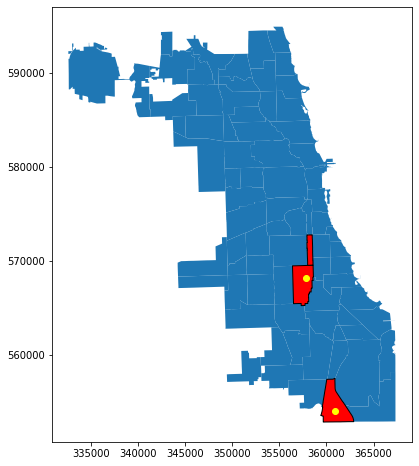

In [73]:
libs_top3.plot(color = 'yellow', 
               ax = top3_geom.plot(color = 'red',
                                   edgecolor = 'black', 
                                   ax = comm_areas.plot(figsize = (8, 8))))

Plot the Chicago's community areas with the color being coded by the percent of population over 16 that is unemployed.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


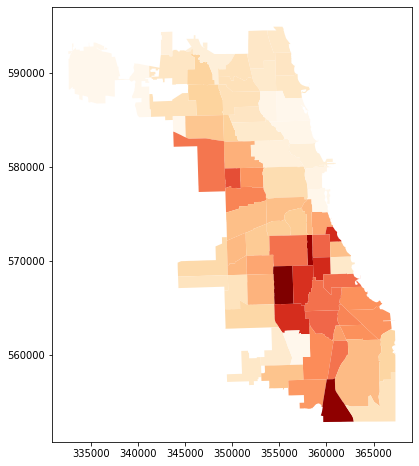

In [86]:
socioecon['COMMUNITY AREA NAME'] = socioecon['COMMUNITY AREA NAME'].str.upper()
comm_areas_w_socioecon = comm_areas.merge(socioecon[['COMMUNITY AREA NAME', 'PERCENT AGED 16+ UNEMPLOYED']], left_on = 'community', right_on = 'COMMUNITY AREA NAME', how = 'left')
comm_areas_w_socioecon.plot(column = 'PERCENT AGED 16+ UNEMPLOYED', figsize = (8, 8), cmap = 'OrRd')

Now Plot the same points from above and all libraries with a .5 mile radius boundary.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


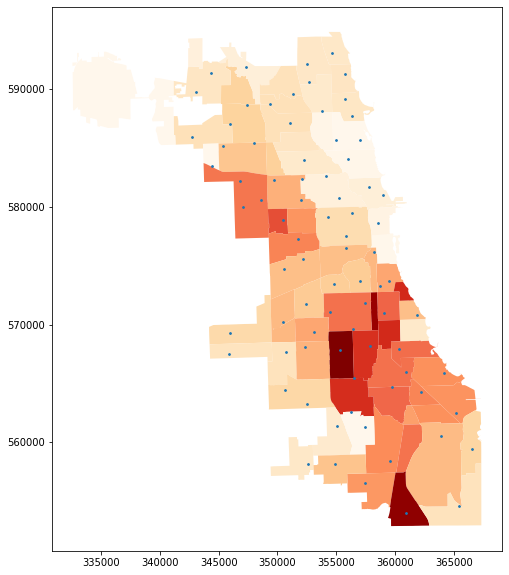

In [85]:
libraries.plot(markersize = 3,
               ax = comm_areas_w_socioecon.plot(column = 'PERCENT AGED 16+ UNEMPLOYED', 
                                                figsize = (10, 10), cmap = 'OrRd'))